# Yandex Realty Sell Database Predictions

**Data:** Yandex Realty logs from 2018

**Task:** predict prices for apartments for sell db on Yandex Realty website


# Import libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly

In [2]:
# set_option function fron pandas library to edit limit for number of the displayed
# columns, width of all columns and maximum width of one column
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

In [2]:
# let's look what is inside our data file to understand how we can export it 
!head -n 3 ~/__DATA/E2ESML_Spring2023/data/spb.real.estate.archive.2018.tsv

offer_id	first_day_exposition	last_day_exposition	last_price	floor	open_plan	rooms	studio	area	kitchen_area	living_area	agent_fee	renovation	offer_type	category_type	unified_address	building_id
5490504238877583424	2014-11-27T00:00:00+03:00	2016-03-14T00:00:00+03:00	3676740.0	19	False	1	False	27.4	16.56	16.56		0.0	1	2	Россия, Санкт-Петербург, улица Шкапина, 9-11	3552413344225333068
5490504238903444021	2014-11-27T00:00:00+03:00	2016-04-28T00:00:00+03:00	7038880.0	2	False	3	False	85.84	19.64	41.2		0.0	1	2	Россия, Санкт-Петербург, Кушелевская дорога, 3к4	7274736308217971906


In [3]:
# we see that it's tab separated file, we can load it with pd.read_table method
# load our dataset and see which data it contains
spb_df = pd.read_table('~/__DATA/E2ESML_Spring2023/data/spb.real.estate.archive.2018.tsv')

In [4]:
spb_df.sample(5000).to_csv('spb.real.estate.archive.sample5000.tsv', index = False, sep='\t')

In [5]:
# let's split our dataframe to rent and sell
# select some part of dataframe according to conditions in brackets
rent_df = spb_df[spb_df.offer_type == 2]
sell_df = spb_df[spb_df.offer_type == 1]
print("Total rent data size: {}".format(len(rent_df)))
print("Total sell data size: {}".format(len(sell_df)))

Total rent data size: 171186
Total sell data size: 258001


In [6]:
#calculate median prices for apts for sell for not cleaned data
sell_median_price = sell_df.last_price.median()
sell_mean_price = sell_df.last_price.mean()
print("Sell median price: {}".format(sell_median_price))
print("Sell mean price: {}".format(sell_mean_price))

Sell median price: 4599000.0
Sell mean price: 6969288.146034318


In [7]:
#here should be a typo
max_price_sell = sell_df.last_price.max()
max_price_sell

763000000.0

In [8]:
max_price_sell = sell_df[sell_df.last_price == max_price_sell]
max_price_sell

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
224434,619165944711730944,2017-09-30T00:00:00+03:00,2017-11-02T00:00:00+03:00,763000000.0,10,False,7,False,400.0,NaN,250.0,NaN,1.0,1,2,"Россия, Санкт-Петербург, Мичуринская улица, 4",7962972499404580673


In [9]:
#we can try to first eliminate houses with price over 400 mln rub
outliers_sell = sell_df[sell_df.last_price > 400000000]
print("Number of outliers in sell: {}".format(len(outliers_sell)))

Number of outliers in sell: 19


In [10]:
outliers_sell

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
1036,5028522700590625318,2015-01-21T00:00:00+03:00,2017-01-09T00:00:00+03:00,715000000.0,1,False,9,False,550.0,NaN,NaN,NaN,0.0,1,2,"Россия, Санкт-Петербург, Большая Пушкарская улица, 1",2009094821262044658
4062,5028522700596204200,2015-04-16T00:00:00+03:00,2017-01-09T00:00:00+03:00,470000000.0,1,False,5,False,700.0,130.0,675.0,NaN,0.0,1,2,"Россия, Санкт-Петербург, Английская набережная, 22",3056341244765973000
12935,5490504238964636572,2015-09-18T00:00:00+03:00,2016-08-01T00:00:00+03:00,401300320.0,9,False,5,False,825.5,41.0,185.0,NaN,0.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76к2",8192868485509619740
15358,5028522704318229029,2015-09-28T00:00:00+03:00,2017-01-09T00:00:00+03:00,401300000.0,9,False,6,False,352.5,18.0,175.0,NaN,6.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76к2",8192868485509619740
26451,5028522700620392289,2015-12-10T00:00:00+03:00,2016-02-22T00:00:00+03:00,602400000.0,9,False,8,False,602.4,23.5,309.6,NaN,0.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76",3406104650917898324
26561,5028522700620392291,2015-12-10T00:00:00+03:00,2017-01-09T00:00:00+03:00,401300000.0,9,False,6,False,352.5,18.0,175.0,NaN,0.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76",3406104650917898324
48666,5028522700620450104,2016-03-21T00:00:00+03:00,2016-07-05T00:00:00+03:00,401300000.0,9,False,6,False,352.5,18.0,175.0,NaN,0.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 75",3406104650917898325
48761,5028522700620450081,2016-03-21T00:00:00+03:00,2017-01-09T00:00:00+03:00,602400000.0,9,False,8,False,525.8,23.5,224.1,NaN,0.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76",3406104650917898324
62961,5028522704340151610,2016-05-16T00:00:00+03:00,2017-01-09T00:00:00+03:00,602400000.0,9,False,8,False,525.8,23.5,308.6,NaN,6.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76к2",8192868485509619740
71388,465842340730588673,2016-02-20T00:00:00+03:00,2017-03-19T00:00:00+03:00,401300000.0,9,False,5,False,401.0,24.0,204.0,NaN,1.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76к2",8192868485509619740


In [11]:
sell_df[(sell_df.last_price > 70000000) & (sell_df.last_price < 400000000)]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
44,398271068452753600,2014-11-27T00:00:00+03:00,2016-10-19T00:00:00+03:00,76000000.0,3,False,6,False,264.0,60.00,178.00,NaN,0.0,1,2,"Россия, Санкт-Петербург, Аптекарский переулок, 4",3756270137055046483
154,5028522699968447192,2014-12-09T00:00:00+03:00,2016-09-01T00:00:00+03:00,104750000.0,7,False,4,False,209.5,19.20,117.80,NaN,0.0,1,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355
239,5028522700593664252,2014-11-27T00:00:00+03:00,2017-01-09T00:00:00+03:00,144000000.0,6,False,6,False,387.0,NaN,NaN,NaN,0.0,1,2,"Россия, Санкт-Петербург, Большая Конюшенная улица, 10",2673376664769372453
430,787907,2014-12-10T00:00:00+03:00,2017-11-09T00:00:00+03:00,107000000.0,9,True,0,False,249.7,NaN,NaN,NaN,0.0,1,2,"Россия, Санкт-Петербург, Таврическая улица, 35",8255041317048885714
431,787857,2014-12-10T00:00:00+03:00,2017-11-09T00:00:00+03:00,165000000.0,9,True,0,False,214.7,NaN,125.00,NaN,0.0,1,2,"Россия, Санкт-Петербург, Тверская улица, 6",4994643413828974795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427084,2506248553660098561,2017-07-10T00:00:00+03:00,2018-08-20T00:00:00+03:00,89300000.0,4,False,3,False,217.8,23.00,103.60,NaN,NaN,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76к2",8192868485509619740
427086,8310251212209955174,2018-05-30T00:00:00+03:00,2018-08-20T00:00:00+03:00,89500000.0,5,False,3,False,145.7,20.31,87.23,0.0,1.0,1,2,"Россия, Санкт-Петербург, Смольный проспект, 13",8940290802509467665
427090,2554639205173486692,2015-02-19T00:00:00+03:00,2018-08-20T00:00:00+03:00,90000000.0,4,False,6,False,267.0,34.00,139.10,NaN,NaN,1,2,"Россия, Санкт-Петербург, набережная реки Мойки, 6",4038001241642400932
428107,8310251212209955178,2018-04-17T00:00:00+03:00,2018-08-20T00:00:00+03:00,78700000.0,3,False,4,False,149.8,24.18,87.43,0.0,1.0,1,2,"Россия, Санкт-Петербург, Смольный проспект, 13",8940290802509467665


In [12]:
#we can calculate the price per sq m, but i son't really like this qpproach, as the price may be heavily influenced by the location
sell_df['price_per_sq_m_sell'] = sell_df.last_price/sell_df.area
sell_df.head(5)

/tmp/ipykernel_326/722565798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_df['price_per_sq_m_sell'] = sell_df.last_price/sell_df.area


,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m_sell
0,5490504238877583424,2014-11-27T00:00:00+03:00,2016-03-14T00:00:00+03:00,3676740.0,19,False,1,False,27.40,16.56,16.56,NaN,0.0,1,2,"Россия, Санкт-Петербург, улица Шкапина, 9-11",3552413344225333068,134187.591241
1,5490504238903444021,2014-11-27T00:00:00+03:00,2016-04-28T00:00:00+03:00,7038880.0,2,False,3,False,85.84,19.64,41.20,NaN,0.0,1,2,"Россия, Санкт-Петербург, Кушелевская дорога, 3к4",7274736308217971906,82000.000000
2,5490504238903447743,2014-11-27T00:00:00+03:00,2016-05-11T00:00:00+03:00,7038880.0,3,False,3,False,85.84,19.64,41.20,NaN,0.0,1,2,"Россия, Санкт-Петербург, Кушелевская дорога, 3к4",7274736308217971906,82000.000000
3,5490504238877673946,2014-11-27T00:00:00+03:00,2016-05-12T00:00:00+03:00,12074400.0,5,False,3,False,93.60,10.90,52.00,NaN,0.0,1,2,"Россия, Санкт-Петербург, Свердловская набережная, 58А",5917543958366039686,129000.000000
4,5490504238877648740,2014-11-27T00:00:00+03:00,2016-05-12T00:00:00+03:00,20406100.0,7,False,4,False,142.70,13.84,82.55,NaN,0.0,1,2,"Россия, Санкт-Петербург, Свердловская набережная, 58А",5917543958366039686,143000.000000


In [13]:
# find what's median and mean price per square meter in sell
median_price_per_sq_m_sell = sell_df.price_per_sq_m_sell.median()
mean_price_per_sq_m_sell = sell_df.price_per_sq_m_sell.mean()
print("Median price per sq m in sell: {}".format(median_price_per_sq_m_sell))
print("Mean price per sq m in sell: {}".format(mean_price_per_sq_m_sell))

Median price per sq m in sell: 95214.28571428571
Mean price per sq m in sell: 102713.8800799551


In [14]:
# median price per sq m per house
house_sell_df = sell_df.groupby('unified_address').price_per_sq_m_sell.median().reset_index()
house_sell_df.head(5)

,unified_address,price_per_sq_m_sell
0,"Россия, Ленинградская область, Бокситогорск, Городская улица, 1",15316.249610
1,"Россия, Ленинградская область, Бокситогорск, Городская улица, 3",19080.327869
2,"Россия, Ленинградская область, Бокситогорск, Городская улица, 4",20812.534664
3,"Россия, Ленинградская область, Бокситогорск, Дымское шоссе, 1",14600.000000
4,"Россия, Ленинградская область, Бокситогорск, Заводская улица, 11",14642.978290


In [15]:
house_sell_df.rename(columns = {'price_per_sq_m_sell': 'house_price_sqm_median_sell'}, inplace = True)

In [16]:
sell_df = sell_df.merge(house_sell_df)

In [17]:
outliers = sell_df[(sell_df.price_per_sq_m_sell/sell_df.house_price_sqm_median_sell) > 5]

In [18]:
print(len(outliers))

52


In [19]:
outliers.sample(10)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m_sell,house_price_sqm_median_sell
219687,5152210162991259328,2017-01-25T00:00:00+03:00,2017-09-04T00:00:00+03:00,80000000.0,1,False,3,False,79.00,10.00,55.00,NaN,0.0,1,2,"Россия, Санкт-Петербург, Гаванская улица, 7",6399847288779934223,1.012658e+06,107526.881720
55606,3255552,2015-07-14T00:00:00+03:00,2016-02-20T00:00:00+03:00,13338780.0,2,False,1,False,25.26,5.12,14.14,NaN,2.0,1,2,"Россия, Ленинградская область, Всеволожский район, Сертолово, Пограничная улица, 3к1",2155488592838538573,5.280594e+05,53000.000000
186782,7059734441784943105,2017-01-18T00:00:00+03:00,2017-04-27T00:00:00+03:00,50000000.0,1,False,1,False,43.00,10.20,21.00,NaN,10.0,1,2,"Россия, Санкт-Петербург, проспект Непокорённых, 10к1",4653981712364002434,1.162791e+06,115594.059406
15996,2547228509556334337,2016-12-17T00:00:00+03:00,2017-03-18T00:00:00+03:00,30900000.0,6,False,1,False,36.10,10.30,15.20,NaN,3.0,1,2,"Россия, Ленинградская область, Всеволожский район, деревня Новое Девяткино, Арсенальная улица, 1",1966219418622870602,8.559557e+05,80555.555556
162440,5153034022900498092,2017-11-15T00:00:00+03:00,2018-01-20T00:00:00+03:00,57000000.0,4,False,3,False,63.00,7.20,41.30,NaN,NaN,1,2,"Россия, Санкт-Петербург, проспект Ветеранов, 142",6845097171321796802,9.047619e+05,91904.761905
185078,619165944711730944,2017-09-30T00:00:00+03:00,2017-11-02T00:00:00+03:00,763000000.0,10,False,7,False,400.00,NaN,250.00,NaN,1.0,1,2,"Россия, Санкт-Петербург, Мичуринская улица, 4",7962972499404580673,1.907500e+06,283453.422542
38640,5028522700620450104,2016-03-21T00:00:00+03:00,2016-07-05T00:00:00+03:00,401300000.0,9,False,6,False,352.50,18.00,175.00,NaN,0.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 75",3406104650917898325,1.138440e+06,110843.373494
128672,2029365665568947713,2018-06-24T00:00:00+03:00,2018-08-20T00:00:00+03:00,35000000.0,1,False,2,False,51.00,7.00,28.00,NaN,2.0,1,2,"Россия, Санкт-Петербург, Колпино, Заводской проспект, 18",1549642848657229329,6.862745e+05,66608.539765
189514,2245016279586032848,2016-10-13T00:00:00+03:00,2016-11-02T00:00:00+03:00,32345678.0,5,False,1,False,47.00,NaN,20.00,NaN,0.0,1,2,"Россия, Ленинградская область, Кировский район, Отрадное, Никольское шоссе, 2к1",6440588557749978017,6.882059e+05,68459.657702
256110,5485935064186424652,2018-06-27T00:00:00+03:00,2018-08-20T00:00:00+03:00,24412900.0,4,False,1,False,38.12,10.70,16.83,NaN,5.0,1,2,"Россия, Ленинградская область, Всеволожск, микрорайон Южный, улица Доктора Сотникова, 31",2624586177104353974,6.404224e+05,60355.907069


In [20]:
sell_df_cleaned = sell_df[~((sell_df.price_per_sq_m_sell/sell_df.house_price_sqm_median_sell) > 5)]

In [21]:
sell_df_cleaned[(sell_df_cleaned.last_price > 70000000) & (sell_df_cleaned.last_price < 400000000)]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m_sell,house_price_sqm_median_sell
1297,398271068452753600,2014-11-27T00:00:00+03:00,2016-10-19T00:00:00+03:00,76000000.0,3,False,6,False,264.00,60.00,178.00,NaN,0.0,1,2,"Россия, Санкт-Петербург, Аптекарский переулок, 4",3756270137055046483,287878.787879,215251.156642
1298,5028522700589824838,2014-11-27T00:00:00+03:00,2016-06-04T00:00:00+03:00,129641000.0,5,False,2,False,242.90,14.20,200.80,NaN,0.0,1,2,"Россия, Санкт-Петербург, Аптекарский переулок, 4",3756270137055046483,533721.696171,215251.156642
2162,6129211147471614549,2015-01-21T00:00:00+03:00,2017-06-21T00:00:00+03:00,72419000.0,8,False,4,False,210.89,21.00,143.40,NaN,0.0,1,2,"Россия, Санкт-Петербург, Каменноостровский проспект, 64",5622402749203138778,343397.031628,279476.462824
2170,321088581220825252,2015-01-21T00:00:00+03:00,2017-03-31T00:00:00+03:00,90583000.0,8,False,4,False,254.72,25.30,106.90,NaN,0.0,1,2,"Россия, Санкт-Петербург, Каменноостровский проспект, 64",5622402749203138778,355617.933417,279476.462824
2178,8308010880381313485,2017-10-02T00:00:00+03:00,2017-11-01T00:00:00+03:00,87700000.0,7,False,4,False,214.00,28.00,133.00,0.0,0.0,1,2,"Россия, Санкт-Петербург, Каменноостровский проспект, 64",5622402749203138778,409813.084112,279476.462824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254858,1312747617989515616,2018-08-07T00:00:00+03:00,2018-08-20T00:00:00+03:00,105000000.0,4,False,4,False,194.00,20.00,119.00,NaN,NaN,1,2,"Россия, Санкт-Петербург, набережная Кутузова, 24",7246731949853653443,541237.113402,428392.857143
255868,4889194319656009472,2018-06-19T00:00:00+03:00,2018-08-20T00:00:00+03:00,100000000.0,9,False,5,False,290.70,40.00,147.20,NaN,NaN,1,2,"Россия, Санкт-Петербург, улица Рентгена, 19",502630413102072625,343997.248022,185000.000000
256966,5511293275419583654,2018-05-19T00:00:00+03:00,2018-08-20T00:00:00+03:00,79786448.0,12,False,4,False,263.60,15.29,134.93,NaN,NaN,1,2,"Россия, Санкт-Петербург, Пионерская улица, 5/20",7651831335807888863,302680.000000,302680.000000
256967,4829394877221044769,2018-02-21T00:00:00+03:00,2018-08-20T00:00:00+03:00,81863120.0,12,False,3,False,250.30,31.73,101.54,NaN,NaN,1,2,"Россия, Санкт-Петербург, Пионерская улица, 5/20",7651831335807888863,327060.007990,302680.000000


In [22]:
sell_df_cleaned[(sell_df_cleaned.last_price >= 400000000)]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m_sell,house_price_sqm_median_sell
17596,4479241398939301120,2017-11-20T00:00:00+03:00,2018-08-20T00:00:00+03:00,450000000.0,2,False,6,False,470.0,NaN,NaN,NaN,NaN,1,2,"Россия, Санкт-Петербург, Морской проспект, 33",7313362257532056812,9.574468e+05,345833.333333
32771,2554639205142175302,2017-12-06T00:00:00+03:00,2018-03-22T00:00:00+03:00,420000000.0,25,False,12,False,900.0,112.0,409.7,NaN,NaN,1,2,"Россия, Санкт-Петербург, улица Кораблестроителей, 32к1",7323709713868739342,4.666667e+05,142857.142857
33586,8310251191854456764,2016-10-12T00:00:00+03:00,2018-07-24T00:00:00+03:00,400000000.0,13,False,5,False,903.0,100.0,500.0,0.0,2.0,1,2,"Россия, Санкт-Петербург, Воскресенская набережная, 4",7262659557693263963,4.429679e+05,300205.968050
57385,5028522700596204200,2015-04-16T00:00:00+03:00,2017-01-09T00:00:00+03:00,470000000.0,1,False,5,False,700.0,130.0,675.0,NaN,0.0,1,2,"Россия, Санкт-Петербург, Английская набережная, 22",3056341244765973000,6.714286e+05,182692.307692
69929,5028522700620392289,2015-12-10T00:00:00+03:00,2016-02-22T00:00:00+03:00,602400000.0,9,False,8,False,602.4,23.5,309.6,NaN,0.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76",3406104650917898324,1.000000e+06,500000.000000
69932,5028522700620392291,2015-12-10T00:00:00+03:00,2017-01-09T00:00:00+03:00,401300000.0,9,False,6,False,352.5,18.0,175.0,NaN,0.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76",3406104650917898324,1.138440e+06,500000.000000
69948,5028522700620450081,2016-03-21T00:00:00+03:00,2017-01-09T00:00:00+03:00,602400000.0,9,False,8,False,525.8,23.5,224.1,NaN,0.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76",3406104650917898324,1.145683e+06,500000.000000
81032,5490504238964636572,2015-09-18T00:00:00+03:00,2016-08-01T00:00:00+03:00,401300320.0,9,False,5,False,825.5,41.0,185.0,NaN,0.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76к2",8192868485509619740,4.861300e+05,500000.000000
81042,5028522704318229029,2015-09-28T00:00:00+03:00,2017-01-09T00:00:00+03:00,401300000.0,9,False,6,False,352.5,18.0,175.0,NaN,6.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76к2",8192868485509619740,1.138440e+06,500000.000000
81052,5028522704340151610,2016-05-16T00:00:00+03:00,2017-01-09T00:00:00+03:00,602400000.0,9,False,8,False,525.8,23.5,308.6,NaN,6.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76к2",8192868485509619740,1.145683e+06,500000.000000


In [23]:
sell_df_cleaned = sell_df_cleaned[sell_df_cleaned.last_price < 400000000]

In [24]:
#I want to try to include lux apts
sell_df_cleaned[sell_df_cleaned.house_price_sqm_median_sell > 500000]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m_sell,house_price_sqm_median_sell
21297,5028522699967374693,2014-11-27T00:00:00+03:00,2016-06-23T00:00:00+03:00,120000000.0,3,False,4,False,207.0,46.8,138.3,NaN,0.0,1,2,"Россия, Санкт-Петербург, набережная реки Мойки, 9",4038001241642400929,5.797101e+05,5.797101e+05
21889,5028522699966386624,2014-12-29T00:00:00+03:00,2017-01-09T00:00:00+03:00,50848000.0,3,False,2,False,93.3,23.4,49.6,NaN,0.0,1,2,"Россия, Санкт-Петербург, набережная реки Мойки, 49",3949170025052432415,5.449946e+05,6.436663e+05
21890,8310251268149289485,2018-02-16T00:00:00+03:00,2018-03-26T00:00:00+03:00,160000000.0,4,False,4,False,194.2,22.7,137.2,2.0,NaN,1,2,"Россия, Санкт-Петербург, набережная реки Мойки, 49",3949170025052432415,8.238929e+05,6.436663e+05
21891,8310251191854424061,2018-02-15T00:00:00+03:00,2018-08-20T00:00:00+03:00,125000000.0,4,False,4,False,194.2,22.7,137.2,0.0,1.0,1,2,"Россия, Санкт-Петербург, набережная реки Мойки, 49",3949170025052432415,6.436663e+05,6.436663e+05
21892,5028522699966386622,2014-12-02T00:00:00+03:00,2017-01-09T00:00:00+03:00,50848000.0,3,False,2,False,93.3,23.4,49.6,NaN,0.0,1,2,"Россия, Санкт-Петербург, Большая Морская улица, 4",853468021940296985,5.449946e+05,6.436663e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247749,6184707344369898871,2018-01-10T00:00:00+03:00,2018-08-20T00:00:00+03:00,80000000.0,6,False,4,False,156.0,26.0,103.5,NaN,NaN,1,2,"Россия, Санкт-Петербург, Конная улица, 24",3242117185209680083,5.128205e+05,5.128205e+05
252215,8310251191879356399,2017-07-10T00:00:00+03:00,2018-08-20T00:00:00+03:00,109900000.0,2,False,4,False,140.2,44.3,79.7,0.0,1.0,1,2,"Россия, Санкт-Петербург, Депутатская улица, 8",7168777433308944355,7.838802e+05,7.838802e+05
252644,3094343811119509760,2017-11-20T00:00:00+03:00,2018-08-20T00:00:00+03:00,95000000.0,6,False,3,False,117.5,10.0,84.0,NaN,NaN,1,2,"Россия, Санкт-Петербург, Каменноостровский проспект, 35/75",564112227981355965,8.085106e+05,8.085106e+05
257089,2813360794962873345,2018-07-13T00:00:00+03:00,2018-07-17T00:00:00+03:00,9999999.0,6,False,1,False,6.0,NaN,NaN,NaN,NaN,1,2,"Россия, Санкт-Петербург, Антоновская улица, 3",7422762128480584443,1.666666e+06,1.666666e+06


In [25]:
outliers_count_sell = len(sell_df_cleaned[(sell_df_cleaned.last_price < 400000000) 
                                     & ((sell_df_cleaned.house_price_sqm_median_sell > 500000) 
                                        | (sell_df_cleaned.house_price_sqm_median_sell == sell_df_cleaned.price_per_sq_m_sell))])
print("outliers found: {}".format(outliers_count_sell))
sell_df_cleaned = sell_df_cleaned[~((sell_df_cleaned.last_price < 400000000) 
                                     & ((sell_df_cleaned.house_price_sqm_median_sell > 500000) 
                                        | (sell_df_cleaned.house_price_sqm_median_sell == sell_df_cleaned.price_per_sq_m_sell)))]

outliers found: 21329


In [26]:
max_sell_apartment = sell_df_cleaned[sell_df_cleaned.last_price == sell_df_cleaned.last_price.max()]
max_sell_apartment

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m_sell,house_price_sqm_median_sell
81124,8310251269065513544,2017-02-07T00:00:00+03:00,2018-03-26T00:00:00+03:00,395000000.0,9,False,5,False,525.8,23.5,259.1,NaN,NaN,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76к2",8192868485509619740,751236.211487,500000.0
81157,2332956270629039629,2018-04-12T00:00:00+03:00,2018-05-28T00:00:00+03:00,395000000.0,9,False,7,False,525.8,NaN,NaN,NaN,4.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76к2",8192868485509619740,751236.211487,500000.0


In [27]:
max_sell_apartment.unified_address.iloc[0]

'Россия, Санкт-Петербург, набережная реки Фонтанки, 76к2'

In [28]:
#find most cheapest houses per sq m in St.Petersburg after cleaning outliers
house_sell_df_cleaned = sell_df_cleaned.groupby('unified_address').price_per_sq_m_sell.median().reset_index()
house_sell_df_cleaned.rename(columns = {'price_per_sq_m_sell': 'house_price_sqm_median_cleaned_sell'}, inplace = True)

most_cheapest_house = house_sell_df_cleaned[house_sell_df_cleaned.house_price_sqm_median_cleaned_sell == house_sell_df_cleaned.house_price_sqm_median_cleaned_sell.min()]
most_cheapest_house

,unified_address,house_price_sqm_median_cleaned_sell
18016,"Россия, Санкт-Петербург, переулок Лодыгина, 7",5616.474993


In [29]:
house_sell_df_cleaned_spb = house_sell_df_cleaned[house_sell_df_cleaned.unified_address.str.contains('Россия, Санкт-Петербург')]
house_sell_df_cleaned_spb[house_sell_df_cleaned_spb.house_price_sqm_median_cleaned_sell == house_sell_df_cleaned_spb.house_price_sqm_median_cleaned_sell.min()]

,unified_address,house_price_sqm_median_cleaned_sell
18016,"Россия, Санкт-Петербург, переулок Лодыгина, 7",5616.474993


In [30]:
sell_df_cleaned_spb = sell_df_cleaned[sell_df_cleaned.unified_address.str.contains('Россия, Санкт-Петербург')]
median_price_per_sq_m_in_spb_sell = sell_df_cleaned_spb.price_per_sq_m_sell.median()
print("Median price per sq m in St. Petersburg in sell: {}".format(median_price_per_sq_m_in_spb_sell))

Median price per sq m in St. Petersburg in sell: 102803.73831775702


In [31]:
sell_df_cleaned_spb[sell_df_cleaned_spb.price_per_sq_m_sell < 80000].sample(10)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m_sell,house_price_sqm_median_sell
251091,6657361447548985587,2018-08-15T00:00:00+03:00,2018-08-20T00:00:00+03:00,1542197.0,1,False,0,True,25.29,NaN,NaN,NaN,6.0,1,2,"Россия, Санкт-Петербург, Колпино, Загородная улица, 43к4",2276804641559375382,60980.506129,59584.007316
239032,4829394877196083750,2018-07-26T00:00:00+03:00,2018-08-20T00:00:00+03:00,2504526.0,19,False,1,False,33.69,9.17,14.04,NaN,NaN,1,2,"Россия, Санкт-Петербург, территория Усть-Славянка, Советский проспект, 39к1",7446714165847919626,74340.338379,74340.350877
3452,7883988734730053632,2016-05-06T00:00:00+03:00,2018-08-20T00:00:00+03:00,6100000.0,23,False,3,False,81.10,13.50,46.10,NaN,3.0,1,2,"Россия, Санкт-Петербург, Ленинский проспект, 51",2190208629105094048,75215.782984,81922.471186
173683,2926037841611393537,2017-01-31T00:00:00+03:00,2017-05-07T00:00:00+03:00,3900000.0,2,False,2,False,50.00,11.00,30.00,NaN,11.0,1,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, Московское шоссе, 288",4169477236027209787,78000.000000,74357.142857
155358,5195649,2016-01-25T00:00:00+03:00,2016-02-01T00:00:00+03:00,4900000.0,2,False,3,False,68.00,10.80,41.30,NaN,3.0,1,2,"Россия, Санкт-Петербург, Петергоф, Ропшинское шоссе, 3к5",5316955799036440743,72058.823529,73747.074212
70885,1343750548527438820,2017-06-07T00:00:00+03:00,2017-06-16T00:00:00+03:00,2300000.0,4,False,1,False,289.00,28.40,29.80,NaN,0.0,1,2,"Россия, Санкт-Петербург, улица Чехова, 4",580791690220049099,7958.477509,96612.903226
199646,2554639205084824616,2017-01-21T00:00:00+03:00,2018-07-27T00:00:00+03:00,4900000.0,1,False,3,False,65.00,7.50,44.80,NaN,NaN,1,2,"Россия, Санкт-Петербург, Петродворцовый район, посёлок Стрельна, Кропоткинская улица, 6к1",1505580161452807149,75384.615385,80034.531360
40143,2967404578174673487,2016-05-25T00:00:00+03:00,2016-11-21T00:00:00+03:00,4500050.0,2,False,3,False,82.50,15.00,49.50,NaN,0.0,1,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, Первомайская улица, 17",5131909042114806906,54546.060606,61526.340996
96949,6300461494541429550,2018-02-01T00:00:00+03:00,2018-08-20T00:00:00+03:00,5900000.0,1,False,4,False,80.00,10.00,55.00,NaN,11.0,1,2,"Россия, Санкт-Петербург, улица Коллонтай, 47к1",6441659253068183024,73750.000000,82903.225806
41141,5356258582204163138,2016-04-02T00:00:00+03:00,2016-04-05T00:00:00+03:00,4400429.0,14,False,2,False,59.40,11.40,32.20,NaN,6.0,1,2,"Россия, Санкт-Петербург, Невский район, муниципальный округ Народный, Русановская улица, 19к2Б",3959909498036690513,74081.296296,80641.477484


In [32]:
outliers = sell_df_cleaned_spb[(sell_df_cleaned_spb.price_per_sq_m_sell < 80000) 
                               & (sell_df_cleaned_spb.house_price_sqm_median_sell/sell_df_cleaned_spb.price_per_sq_m_sell >= 2)]

In [33]:
print("number of cheap outliers 2x cheaper: {}".format(len(outliers)))

number of cheap outliers 2x cheaper: 366


In [34]:
# clean outliers
sell_df_cleaned_spb = sell_df_cleaned_spb[~((sell_df_cleaned_spb.price_per_sq_m_sell < 80000) 
                               & (sell_df_cleaned_spb.house_price_sqm_median_sell/sell_df_cleaned_spb.price_per_sq_m_sell >= 2))]

In [35]:
sell_df_cleaned_spb[sell_df_cleaned_spb.price_per_sq_m_sell < 80000]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m_sell,house_price_sqm_median_sell
15,5490504238964639454,2015-09-18T00:00:00+03:00,2016-05-16T00:00:00+03:00,6135020.0,1,False,3,False,82.90,12.03,47.77,NaN,0.0,1,2,"Россия, Санкт-Петербург, улица Шкапина, 9-11",3552413344225333068,74005.066345,124074.074074
26,4734687,2015-12-01T00:00:00+03:00,2016-02-01T00:00:00+03:00,7100000.0,14,False,3,False,90.01,12.09,54.76,NaN,11.0,1,2,"Россия, Санкт-Петербург, улица Шкапина, 9-11",3552413344225333068,78880.124431,124074.074074
27,4737547,2015-12-02T00:00:00+03:00,2016-01-20T00:00:00+03:00,6950000.0,7,False,3,False,91.00,12.00,56.00,NaN,8.0,1,2,"Россия, Санкт-Петербург, улица Шкапина, 9-11",3552413344225333068,76373.626374,124074.074074
86,8529567325299458141,2017-07-08T00:00:00+03:00,2017-08-09T00:00:00+03:00,2504375.0,9,False,1,False,37.70,12.60,14.50,NaN,0.0,1,2,"Россия, Санкт-Петербург, улица Шкапина, 9-11",3552413344225333068,66429.045093,124074.074074
225,5614092655317046723,2015-01-12T00:00:00+03:00,2017-01-24T00:00:00+03:00,7352400.0,1,False,3,False,93.78,14.10,51.76,NaN,0.0,1,2,"Россия, Санкт-Петербург, Кушелевская дорога, 3к4",7274736308217971906,78400.511836,92153.846154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257195,4737677463275710721,2018-07-19T00:00:00+03:00,2018-08-20T00:00:00+03:00,4400000.0,9,False,2,False,63.00,NaN,NaN,NaN,NaN,1,2,"Россия, Санкт-Петербург, Пушкин, Колпинское шоссе, 40",1329227621315554123,69841.269841,66915.616100
257196,7621245109777909305,2018-08-07T00:00:00+03:00,2018-08-20T00:00:00+03:00,5100000.0,4,False,3,False,79.70,12.60,47.50,0.0,11.0,1,2,"Россия, Санкт-Петербург, Пушкин, Колпинское шоссе, 40",1329227621315554123,63989.962359,66915.616100
257307,7568841808380523752,2018-07-24T00:00:00+03:00,2018-07-27T00:00:00+03:00,3100000.0,5,False,1,False,45.00,13.00,19.00,NaN,NaN,1,2,"Россия, Санкт-Петербург, проспект Стачек, 105к5",604085964252282130,68888.888889,100000.000000
257965,5592490235564484644,2018-06-11T00:00:00+03:00,2018-08-20T00:00:00+03:00,1802000.0,24,False,0,True,25.20,NaN,18.90,NaN,NaN,1,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, Пушкинская улица, 2",7429761349965394630,71507.936508,73043.478261


In [36]:
sell_df_cleaned_spb = sell_df_cleaned_spb[~((sell_df_cleaned_spb.price_per_sq_m_sell < 80000) 
                                          & (sell_df_cleaned_spb.price_per_sq_m_sell == sell_df_cleaned_spb.house_price_sqm_median_sell))]

In [37]:
cheapest_offer = sell_df_cleaned_spb[sell_df_cleaned_spb.price_per_sq_m_sell == sell_df_cleaned_spb.price_per_sq_m_sell.min()]
cheapest_offer

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m_sell,house_price_sqm_median_sell
78947,5709288895787653377,2016-08-24T00:00:00+03:00,2016-10-08T00:00:00+03:00,1250000.0,4,False,0,True,197.1,NaN,118.7,NaN,0.0,1,2,"Россия, Санкт-Петербург, улица Стойкости, 36к1",132296357019531359,6341.958397,7918.781726


In [38]:
house_sell_df_cleaned_spb = sell_df_cleaned_spb.groupby('unified_address').price_per_sq_m_sell.median().reset_index()
house_sell_df_cleaned_spb.rename(columns = {'price_per_sq_m_sell': 'house_price_sqm_median_cleaned_sell'}, inplace = True)
cheapest_house_sell = house_sell_df_cleaned_spb[house_sell_df_cleaned_spb.house_price_sqm_median_cleaned_sell == house_sell_df_cleaned_spb.house_price_sqm_median_cleaned_sell.min()]
cheapest_house_sell

,unified_address,house_price_sqm_median_cleaned_sell
16971,"Россия, Санкт-Петербург, улица Стойкости, 36к1",6341.958397


In [39]:
sell_df_cleaned_spb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183078 entries, 0 to 257966
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   offer_id                     183078 non-null  int64  
 1   first_day_exposition         183078 non-null  object 
 2   last_day_exposition          183078 non-null  object 
 3   last_price                   183078 non-null  float64
 4   floor                        183078 non-null  int64  
 5   open_plan                    183078 non-null  bool   
 6   rooms                        183078 non-null  int64  
 7   studio                       183078 non-null  bool   
 8   area                         183078 non-null  float64
 9   kitchen_area                 155943 non-null  float64
 10  living_area                  165731 non-null  float64
 11  agent_fee                    12221 non-null   float64
 12  renovation                   131625 non-null  float64
 13 

In [40]:
# How many years it takes to cover all money spent on apt purchase if you rent it?
# it's not quite right, but let's take house_price_sqm_median_sell
rental_income = sell_df_cleaned_spb['house_price_sqm_median_sell'] * 12
total_expense = sell_df_cleaned_spb['last_price'] + sell_df_cleaned_spb['agent_fee'] + sell_df_cleaned_spb['renovation']
sell_df_cleaned_spb['years_to_payback'] = total_expense / rental_income

In [41]:
# houses most efficient for investments if you want to rent it
most_effective = sell_df_cleaned_spb.sort_values(by='years_to_payback')
most_effective.head(5)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m_sell,house_price_sqm_median_sell,years_to_payback
74923,236598635325363316,2017-11-29T00:00:00+03:00,2018-03-13T00:00:00+03:00,1800000.0,1,False,0,True,14.1,NaN,NaN,0.0,11.0,1,2,"Россия, Санкт-Петербург, 7-я линия Васильевского острова, 16-18",1461070147066099539,127659.574468,123709.536308,1.212525
14934,7621245107086920984,2017-11-22T00:00:00+03:00,2018-03-30T00:00:00+03:00,1350000.0,1,False,0,True,18.8,NaN,15.8,2.0,2.0,1,2,"Россия, Санкт-Петербург, Парашютная улица, 56к1",6957418200792267847,71808.510638,84102.564103,1.337656
201310,7622724872326482890,2017-07-21T00:00:00+03:00,2017-08-03T00:00:00+03:00,1550000.0,2,False,0,True,15.0,NaN,8.0,0.0,0.0,1,2,"Россия, Санкт-Петербург, Центральный район, улица Некрасова, 1/38",5580280259280797068,103333.333333,95545.368087,1.351888
2158,5848965605886966613,2016-07-07T00:00:00+03:00,2017-07-27T00:00:00+03:00,4800000.0,1,False,2,False,46.0,7.0,24.0,0.0,0.0,1,2,"Россия, Санкт-Петербург, Каменноостровский проспект, 64",5622402749203138778,104347.826087,279476.462824,1.431248
32167,236598654908655048,2018-05-03T00:00:00+03:00,2018-08-06T00:00:00+03:00,2990000.0,1,False,0,True,17.9,NaN,NaN,0.0,11.0,1,2,"Россия, Санкт-Петербург, Московский проспект, 216",4373184457909325850,167039.106145,162236.795619,1.535827


In [42]:
# houses most inefficient for investments if you want to rent it
most_ineffective = sell_df_cleaned_spb.sort_values(by='years_to_payback', ascending=False)
most_ineffective.head(5)


,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m_sell,house_price_sqm_median_sell,years_to_payback
243547,5713693627264289949,2018-07-30T00:00:00+03:00,2018-08-20T00:00:00+03:00,200000000.0,15,False,6,False,600.0,100.0,231.0,0.0,5.0,1,2,"Россия, Санкт-Петербург, Ушаковская набережная, 3к1",2382674064396192369,3.333333e+05,147374.219264,113.090791
57390,7621245106349679139,2017-06-27T00:00:00+03:00,2017-08-16T00:00:00+03:00,225000000.0,3,False,1,False,750.0,NaN,710.0,50.0,5.0,1,2,"Россия, Санкт-Петербург, Английская набережная, 22",3056341244765973000,3.000000e+05,182692.307692,102.631604
7439,8310251211319744363,2018-04-04T00:00:00+03:00,2018-08-20T00:00:00+03:00,330000000.0,6,False,3,False,190.0,25.0,90.0,0.0,1.0,1,2,"Россия, Санкт-Петербург, Большая Конюшенная улица, 10",2673376664769372453,1.736842e+06,369954.557605,74.333454
7438,8310251211319744238,2018-04-04T00:00:00+03:00,2018-08-20T00:00:00+03:00,330000000.0,5,False,3,False,190.0,40.0,95.0,0.0,1.0,1,2,"Россия, Санкт-Петербург, Большая Конюшенная улица, 10",2673376664769372453,1.736842e+06,369954.557605,74.333454
69143,8611816868034285411,2017-12-18T00:00:00+03:00,2018-04-08T00:00:00+03:00,300000000.0,5,False,7,False,618.0,70.0,258.0,0.0,5.0,1,2,"Россия, Санкт-Петербург, Вязовая улица, 8",7789315785929563997,4.854369e+05,352173.919523,70.987654


<AxesSubplot:>

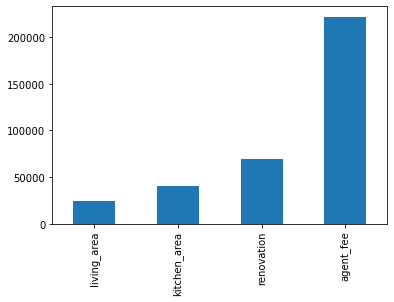

In [43]:
# missing values in the dataset

missing = sell_df_cleaned.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [44]:
# impute mean for area and fee
sell_df_cleaned['renovation'].fillna(0.0, inplace=True)

In [45]:
# impute missing values
sell_df_cleaned['living_area'].fillna(value=sell_df_cleaned['living_area'].mean(), inplace=True)
sell_df_cleaned['kitchen_area'].fillna(value=sell_df_cleaned['kitchen_area'].mean(), inplace=True)
sell_df_cleaned['agent_fee'].fillna(value=sell_df_cleaned['agent_fee'].mean(), inplace=True)

In [46]:
print(sell_df_cleaned.isna().sum())

offer_id                       0
first_day_exposition           0
last_day_exposition            0
last_price                     0
floor                          0
open_plan                      0
rooms                          0
studio                         0
area                           0
kitchen_area                   0
living_area                    0
agent_fee                      0
renovation                     0
offer_type                     0
category_type                  0
unified_address                0
building_id                    0
price_per_sq_m_sell            0
house_price_sqm_median_sell    0
dtype: int64


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='last_price', ylabel='area'>

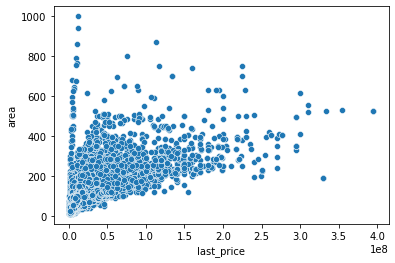

In [47]:
# it doesn't seem like the most expensive apts have more living area
# we can try to look at the correlation instead
sns.scatterplot(sell_df_cleaned['last_price'], sell_df_cleaned['area'])

<AxesSubplot:>

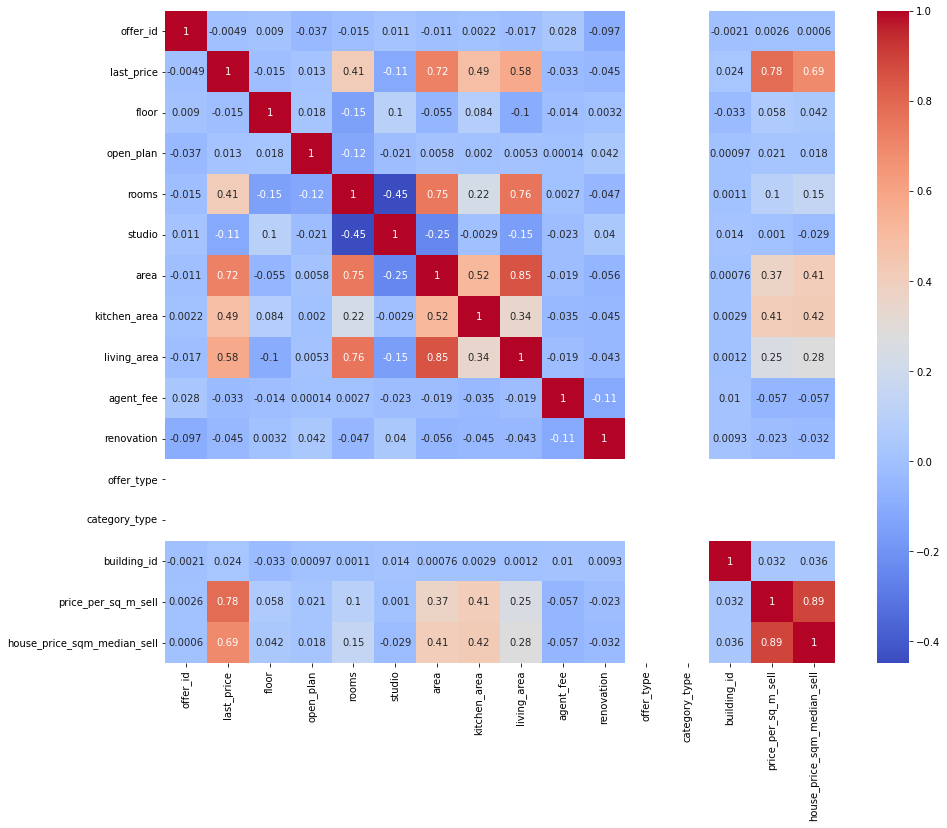

In [48]:
corr_matrix = sell_df_cleaned.corr()
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)

# we can see that price and area are actually strongly positively correlated
# the price has a negative correlation with renovation
# but overall, we cannot get many valuable insights from this map

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='last_price', ylabel='renovation'>

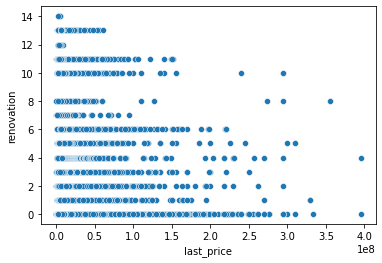

In [49]:
# first, we imputed renovation with nulls, and the plot won't show it in the best way
# however, it doesn't really seem like the price would rise or fall because of renovation
sns.scatterplot(sell_df_cleaned['last_price'], sell_df_cleaned['renovation'])

### Features for the model

#### We can take area, renovation, rooms

# Building a model

In [50]:
sell_df_cleaned['renovation'] = sell_df_cleaned['renovation'].astype(int)

In [51]:
sell_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236605 entries, 0 to 257966
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   offer_id                     236605 non-null  int64  
 1   first_day_exposition         236605 non-null  object 
 2   last_day_exposition          236605 non-null  object 
 3   last_price                   236605 non-null  float64
 4   floor                        236605 non-null  int64  
 5   open_plan                    236605 non-null  bool   
 6   rooms                        236605 non-null  int64  
 7   studio                       236605 non-null  bool   
 8   area                         236605 non-null  float64
 9   kitchen_area                 236605 non-null  float64
 10  living_area                  236605 non-null  float64
 11  agent_fee                    236605 non-null  float64
 12  renovation                   236605 non-null  int64  
 13 

In [52]:
train_df = sell_df_cleaned[(sell_df_cleaned.first_day_exposition >= '2018-01-01') 
                          & (sell_df_cleaned.first_day_exposition < '2018-04-01')]

In [53]:
len(train_df)

23084

In [54]:
# select all offers added in april and may 2018 as test dataset.
test_df = sell_df_cleaned[(sell_df_cleaned.first_day_exposition >= '2018-04-01') 
                          & (sell_df_cleaned.first_day_exposition < '2018-06-01')]

In [55]:
len(test_df)

14576

In [56]:
# holdout dataset
holdout_df = sell_df_cleaned[sell_df_cleaned.first_day_exposition >= '2018-06-01']

In [57]:
len(holdout_df)

19832

In [58]:
train_df.head()

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m_sell,house_price_sqm_median_sell
106,2554639205144850596,2018-02-14T00:00:00+03:00,2018-05-03T00:00:00+03:00,10700000.0,15,False,3,False,88.1,12.000000,54.500000,23.625249,0,1,2,"Россия, Санкт-Петербург, улица Шкапина, 9-11",3552413344225333068,121452.894438,124074.074074
108,7625312544620623604,2018-03-01T00:00:00+03:00,2018-08-18T00:00:00+03:00,9500000.0,15,False,3,False,88.1,11.900000,54.500000,0.000000,4,1,2,"Россия, Санкт-Петербург, улица Шкапина, 9-11",3552413344225333068,107832.009081,124074.074074
110,1215283228282760961,2018-03-14T00:00:00+03:00,2018-07-06T00:00:00+03:00,8500000.0,7,False,2,False,65.3,12.000000,36.000000,23.625249,10,1,2,"Россия, Санкт-Петербург, улица Шкапина, 9-11",3552413344225333068,130168.453292,124074.074074
111,4630383175049219537,2018-03-20T00:00:00+03:00,2018-07-25T00:00:00+03:00,6900000.0,12,False,2,False,55.9,13.520000,29.690000,0.000000,0,1,2,"Россия, Санкт-Петербург, улица Шкапина, 9-11",3552413344225333068,123434.704830,124074.074074
119,7891337966725775617,2018-03-24T00:00:00+03:00,2018-08-20T00:00:00+03:00,5950000.0,11,False,1,False,42.0,11.637695,33.862725,23.625249,0,1,2,"Россия, Санкт-Петербург, улица Шкапина, 9-11",3552413344225333068,141666.666667,124074.074074


In [59]:
train_df.drop(columns=['floor', 'agent_fee', 'first_day_exposition','last_day_exposition', 'offer_id', 'studio', 'kitchen_area', 'living_area', 'offer_type', 'category_type', 'unified_address', 'building_id', 'price_per_sq_m_sell', 'house_price_sqm_median_sell'], inplace=True)
test_df.drop(columns=['floor', 'agent_fee', 'first_day_exposition','last_day_exposition', 'offer_id', 'studio', 'kitchen_area', 'living_area', 'offer_type', 'category_type', 'unified_address', 'building_id', 'price_per_sq_m_sell', 'house_price_sqm_median_sell'], inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [60]:
train_df.head()

,last_price,open_plan,rooms,area,renovation
106,10700000.0,False,3,88.1,0
108,9500000.0,False,3,88.1,4
110,8500000.0,False,2,65.3,10
111,6900000.0,False,2,55.9,0
119,5950000.0,False,1,42.0,0


### Decision Tree

In [61]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [62]:
X_train = train_df.drop('last_price', axis=1)
y_train = train_df['last_price']
X_valid = test_df.drop('last_price', axis=1)
y_valid = test_df['last_price']
y_train= y_train.values.reshape(-1,1)
y_valid= y_valid.values.reshape(-1,1)

In [63]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_valid = sc_X.fit_transform(X_valid)
y_train = sc_y.fit_transform(y_train)
y_valid = sc_y.fit_transform(y_valid)

In [64]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_valid = sc_X.fit_transform(X_valid)
y_train = sc_y.fit_transform(y_train)
y_valid = sc_y.fit_transform(y_valid)

In [65]:
X_train.shape, y_train.shape

((23084, 4), (23084, 1))

In [66]:
tree = DecisionTreeRegressor(max_depth=3, random_state=17)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=17)

In [67]:
tree_predictions = tree.predict(X_valid)

In [68]:
tree_predictions[:5]

array([-0.35729586, -0.04792989,  0.51826289, -0.35729586, -0.35729586])

In [69]:
predictions = sc_y.inverse_transform(tree_predictions[:5])
values = test_df['last_price']
for pred, val in zip(predictions,values):
    print("Prediction: {}, True Value {}".format(pred, val))

Prediction: -0.357295862627804, True Value 5650000.0
Prediction: -0.04792988887394818, True Value 7999000.0
Prediction: 0.5182628945554016, True Value 12500000.0
Prediction: -0.357295862627804, True Value 5600000.0
Prediction: -0.357295862627804, True Value 3950000.0


In [71]:
import numpy as np

print('MAE:', metrics.mean_absolute_error(y_valid, tree_predictions))
print('MSE:', metrics.mean_squared_error(y_valid, tree_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, tree_predictions)))

MAE: 0.24329792894021152
MSE: 0.4714948733241053
RMSE: 0.6866548429335552


### XGBoost

In [72]:
from xgboost import XGBRegressor 

xgb = XGBRegressor() 
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [73]:
xgb_predictions = xgb.predict(X_valid)

In [74]:
predictions1 = sc_y.inverse_transform(xgb_predictions[:5])
values = test_df['last_price']
for pred, val in zip(predictions1,values):
    print("Prediction: {}, True Value {}".format(pred, val))

Prediction: -0.43853965401649475, True Value 5650000.0
Prediction: -0.052445441484451294, True Value 7999000.0
Prediction: 0.40090957283973694, True Value 12500000.0
Prediction: -0.39696812629699707, True Value 5600000.0
Prediction: -0.3548651933670044, True Value 3950000.0


In [75]:
print('MAE:', metrics.mean_absolute_error(y_valid, xgb_predictions))
print('MSE:', metrics.mean_squared_error(y_valid, xgb_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, xgb_predictions)))

MAE: 0.24916596096664476
MSE: 0.6589137520273419
RMSE: 0.8117350257487611


### SVR

In [76]:
from sklearn.svm import SVR

svr = SVR(kernel='linear') 
svr.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(kernel='linear')

In [77]:
svr_predictions = svr.predict(X_valid)

In [78]:
predictions2 = sc_y.inverse_transform(svr_predictions[:5])
values = test_df['last_price']
for pred, val in zip(predictions2,values):
    print("Prediction: {}, True Value {}".format(pred, val))

Prediction: -0.48723415950621124, True Value 5650000.0
Prediction: -0.014615854720407297, True Value 7999000.0
Prediction: 0.39484960646264405, True Value 12500000.0
Prediction: -0.27762753624697684, True Value 5600000.0
Prediction: -0.3842508480574787, True Value 3950000.0


In [79]:
print('MAE:', metrics.mean_absolute_error(y_valid, svr_predictions))
print('MSE:', metrics.mean_squared_error(y_valid, svr_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, svr_predictions)))

MAE: 0.2223472987523527
MSE: 0.47631150153878643
RMSE: 0.6901532449672221


### Now, let's try it with GridSearch

#### DT

In [80]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [17]
}

# Create a DecisionTreeRegressor object
tree = DecisionTreeRegressor()

# Instantiate GridSearchCV
grid_search = GridSearchCV(tree, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'random_state': 17}
Best score:  0.5765619554003034


In [81]:
tree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=17)
tree.fit(X_train, y_train)
tree_predictions = tree.predict(X_valid)

In [82]:
predictions1 = sc_y.inverse_transform(xgb_predictions[:5])
values = test_df['last_price']
for pred, val in zip(predictions1,values):
    print("Prediction: {}, True Value {}".format(pred, val))

Prediction: -0.43853965401649475, True Value 5650000.0
Prediction: -0.052445441484451294, True Value 7999000.0
Prediction: 0.40090957283973694, True Value 12500000.0
Prediction: -0.39696812629699707, True Value 5600000.0
Prediction: -0.3548651933670044, True Value 3950000.0


In [83]:
print('MAE:', metrics.mean_absolute_error(y_valid, tree_predictions))
print('MSE:', metrics.mean_squared_error(y_valid, tree_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, tree_predictions)))

MAE: 0.24329792894021152
MSE: 0.4714948733241053
RMSE: 0.6866548429335552


#### XGBoost

In [84]:
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [3, 4, 5],
              'learning_rate': [0.01, 0.1, 0.2]}

grid_search = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_valid, y_valid)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
Best score:  0.4630712837951075


In [85]:
xgb = XGBRegressor(learning_rate=0.01, max_depth=4, n_estimators=200) 
xgb.fit(X_train, y_train)

xgb_predictions = xgb.predict(X_valid)

predictions1 = sc_y.inverse_transform(xgb_predictions[:5])
values = test_df['last_price']
for pred, val in zip(predictions1,values):
    print("Prediction: {}, True Value {}".format(pred, val))
    

Prediction: -0.3082342743873596, True Value 5650000.0
Prediction: 0.001721738139167428, True Value 7999000.0
Prediction: 0.38558071851730347, True Value 12500000.0
Prediction: -0.2873595654964447, True Value 5600000.0
Prediction: -0.25253260135650635, True Value 3950000.0


In [86]:
print('MAE:', metrics.mean_absolute_error(y_valid, xgb_predictions))
print('MSE:', metrics.mean_squared_error(y_valid, xgb_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, xgb_predictions)))

MAE: 0.2166289749972771
MSE: 0.4291854781190092
RMSE: 0.6551224909274671


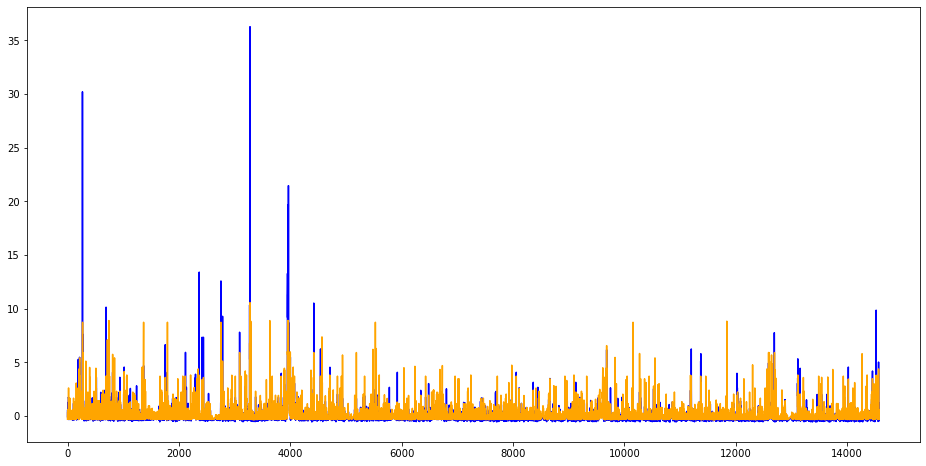

In [94]:
plt.figure(figsize=(16,8))
plt.plot(sc_y.inverse_transform(y_valid),label ='Test', color= 'blue')
plt.plot(sc_y.inverse_transform(xgb_predictions), label = 'predict', color = 'orange')
plt.show()

### Linear regression

In [87]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print('MAE:', metrics.mean_absolute_error(y_valid, model.predict(X_valid)))
print('MSE:', metrics.mean_squared_error(y_valid, model.predict(X_valid)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, model.predict(X_valid))))

MAE: 0.2601352622598956
MSE: 0.45771554019041605
RMSE: 0.6765467760550012


### Random Forest Regr

In [88]:
random_forest_model = RandomForestRegressor(n_estimators=10,
                                    bootstrap=0.8,
                                    max_depth=10,
                                    min_samples_split=3,
                                    max_features=1)
random_forest_model.fit(X_train, y_train)
predictions = random_forest_model.predict(X_valid)
print('MAE:', metrics.mean_absolute_error(y_valid, predictions))
print('MSE:', metrics.mean_squared_error(y_valid, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, predictions)))

MAE: 0.22650168769614798
MSE: 0.48503524203054627
RMSE: 0.6964447157029381


/tmp/ipykernel_326/2114975914.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_train, y_train)


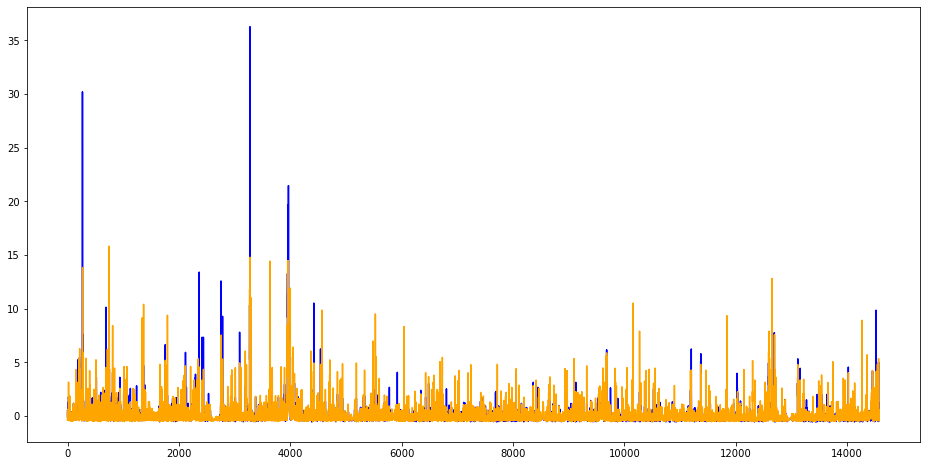

In [89]:
plt.figure(figsize=(16,8))
plt.plot(sc_y.inverse_transform(y_valid),label ='Test', color= 'blue')
plt.plot(sc_y.inverse_transform(predictions), label = 'predict', color = 'orange')
plt.show()

### CatBoost

In [90]:
from catboost import CatBoostRegressor
catboost_model = CatBoostRegressor(iterations=1500, 
                                 depth=7,
                                 learning_rate=0.08,
                                 logging_level='Silent',
                                 thread_count=10,
                                 random_seed=27)
# train the model on training dataset
catboost_model.fit(X_train, y_train)
predictions = catboost_model.predict(X_valid)
print('MAE:', metrics.mean_absolute_error(y_valid, predictions))
print('MSE:', metrics.mean_squared_error(y_valid, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, predictions)))

MAE: 0.2440579272201121
MSE: 0.5888446128437983
RMSE: 0.7673621132449779


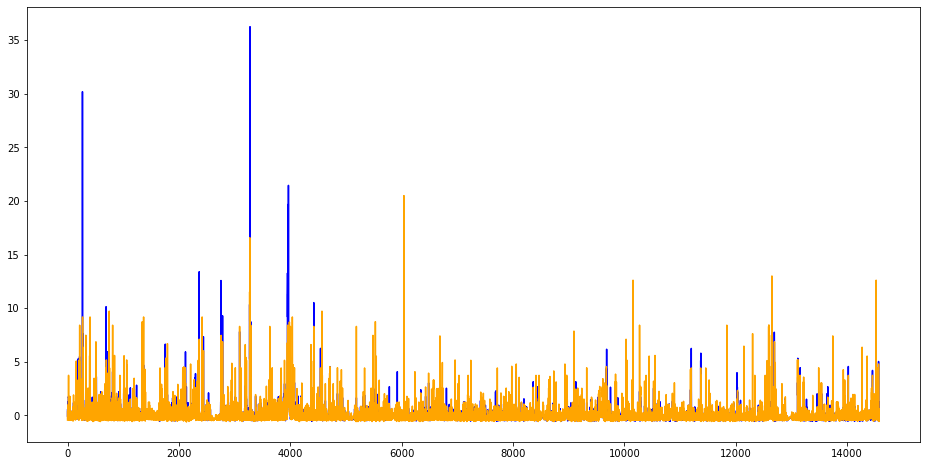

In [91]:
plt.figure(figsize=(16,8))
plt.plot(sc_y.inverse_transform(y_valid),label ='Test', color= 'blue')
plt.plot(sc_y.inverse_transform(predictions), label = 'predict', color = 'orange')
plt.show()

## Saving

#### I have XGBoost with Best parameters:  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}

In [92]:
import joblib

In [93]:
model_file = 'model.pkl'
scaler_x = 'scaler_x.pkl'
scaler_y = 'scaler_y.pkl'
joblib.dump(sc_X, scaler_x)
joblib.dump(sc_y, scaler_y)
joblib.dump(xgb, model_file)

['model.pkl']